In [30]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
np.random.seed(42)

In [31]:
#Read the given box office dataset
df = pd.read_csv('/content/boxOffice.csv') 
df

,box,G,PG,PG13,budget,starpowr,sequel,action,comedy,animated,horror,addict,cmngsoon,fandango,cntwait3
0,19167085,0,0,0,28.0,19.83,0,0,1,0,0,7860.500000,10,144,0.49
1,63106589,0,1,0,150.0,32.69,1,0,0,1,0,5737.000000,59,468,0.79
2,5401605,0,0,0,37.4,15.69,0,0,1,0,0,850.000000,24,198,0.36
3,67528882,0,0,1,200.0,23.62,1,1,0,0,0,15326.000000,93,1778,0.76
4,26223128,0,1,0,150.0,19.02,0,0,0,1,0,4574.250000,30,1109,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,59321095,0,1,0,175.0,34.86,0,0,0,1,0,9085.500000,68,647,0.70
58,5329240,0,0,1,22.0,4.25,0,1,0,0,0,3186.000000,94,39,0.62
59,23004765,0,0,1,16.7,5.96,0,0,0,0,1,17584.000000,58,122,0.53
60,70950500,0,0,1,85.0,16.62,1,1,0,0,0,10609.666670,594,849,0.71


In [32]:
#Check for any null values
df.isnull().any()

box         False
G           False
PG          False
PG13        False
budget      False
starpowr    False
sequel      False
action      False
comedy      False
animated    False
horror      False
addict      False
cmngsoon    False
fandango    False
cntwait3    False
dtype: bool

# Qno:1






No of bins for Box_office 7


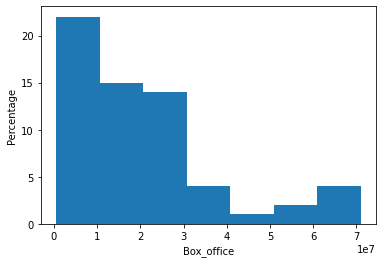

No of bins for Budget 13


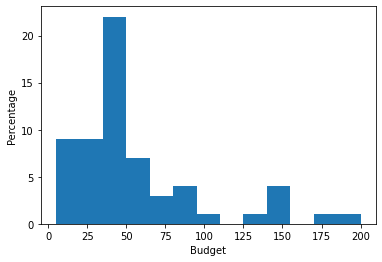

No of bins for starpower 6


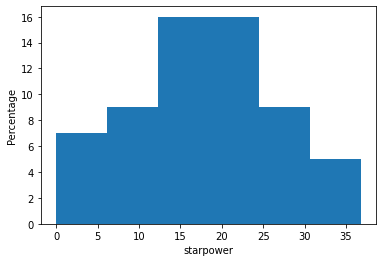

In [33]:
#Get all list values of Box, budget and starpowr
box_data = df['box'].values
budget_data = df['budget'].values
starpowr_data = df['starpowr'].values
dict_values = {'Box_office':box_data,'Budget':budget_data,'starpower':starpowr_data}
l1 = [box_data,budget_data,starpowr_data]
#Plotting histograms for each varaibles
for k,i in dict_values.items():
    q1, q3 = np.percentile(i, [25, 75])
    bin_width = 2 * (q3 - q1) * len(i) ** (-1/3)
    bins = round((i.max() - i.min()) / bin_width)
    print("No of bins for {0} {1}".format(k,bins))
    plt.hist(i,bins=bins)  # density=False would make counts
    plt.ylabel('Percentage')
    plt.xlabel(k)
    plt.show()

**1.In the above figures box_office data and Budget_data are right skewed, next steps would be applying log-transformation to box_office and Budget variables**

In [34]:
df['box'] = np.log(df['box'])
df['budget'] = np.log(df['budget'])
df

,box,G,PG,PG13,budget,starpowr,sequel,action,comedy,animated,horror,addict,cmngsoon,fandango,cntwait3
0,16.768705,0,0,0,3.332205,19.83,0,0,1,0,0,7860.500000,10,144,0.49
1,17.960336,0,1,0,5.010635,32.69,1,0,0,1,0,5737.000000,59,468,0.79
2,15.502207,0,0,0,3.621671,15.69,0,0,1,0,0,850.000000,24,198,0.36
3,18.028066,0,0,1,5.298317,23.62,1,1,0,0,0,15326.000000,93,1778,0.76
4,17.082152,0,1,0,5.010635,19.02,0,0,0,1,0,4574.250000,30,1109,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,17.898476,0,1,0,5.164786,34.86,0,0,0,1,0,9085.500000,68,647,0.70
58,15.488719,0,0,1,3.091042,4.25,0,1,0,0,0,3186.000000,94,39,0.62
59,16.951212,0,0,1,2.815409,5.96,0,0,0,0,1,17584.000000,58,122,0.53
60,18.077493,0,0,1,4.442651,16.62,1,1,0,0,0,10609.666670,594,849,0.71


In [35]:
df1 = df.copy()
df1 = df[df.columns.difference(['addict','cmngsoon','fandango','cntwait3'])]
df1.columns

Index(['G', 'PG', 'PG13', 'action', 'animated', 'box', 'budget', 'comedy',
       'horror', 'sequel', 'starpowr'],
      dtype='object')

# **Qno 2**

In [36]:
#Plotting Linear regression considering all independent variables excluding buzz vaiables
X = df1.drop('box',axis= 1)
y = df1['box']
X1=X.copy()
X1 = sm.add_constant(X1)
linregg = sm.OLS(y,X1).fit()
print(linregg.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     2.656
Date:                Mon, 12 Sep 2022   Prob (F-statistic):             0.0109
Time:                        14:58:17   Log-Likelihood:                -70.832
No. Observations:                  62   AIC:                             163.7
Df Residuals:                      51   BIC:                             187.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.5768      0.688     19.727      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**2.R-squared : 0.342
  Adjusted R-squared : 0.214 
  From the above table it is evident that the associated peobabilities  of budget, horror and sequel are less than 0.10, which implies these variables are statistically evident.**

# **Qno :3** 

In [37]:
#Plotting Linear regression using significant variables from above analysis
df2 = df1.copy()
df2 = df1[['budget','horror','sequel','box']]
X2 = df2.drop('box',axis=1)
y2 = df2['box']
X2 = sm.add_constant(X2)
linregg = sm.OLS(y2,X2).fit()
print(linregg.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     7.929
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           0.000162
Time:                        14:58:20   Log-Likelihood:                -73.175
No. Observations:                  62   AIC:                             154.4
Df Residuals:                      58   BIC:                             162.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.8718      0.611     22.700      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**3.R-squared : 0.291
  Adjusted R-aquared : 0.254 
  All the three variables(budger,horror,sequel) are statistically significant at 0.10 level**

# **Qno:4** 

No of bins for Addict 6


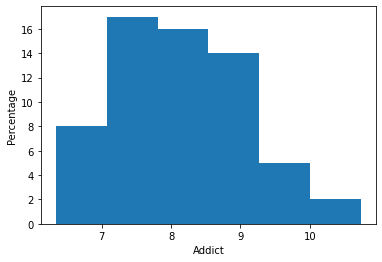

No of bins for Cmngsoon 9


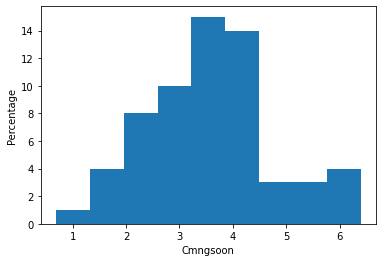

No of bins for Fandango 8


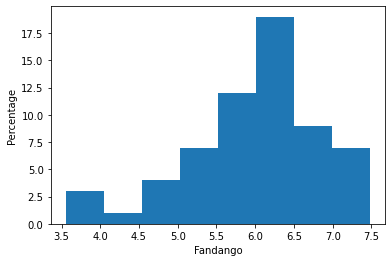

No of bins for Cntwait3 6


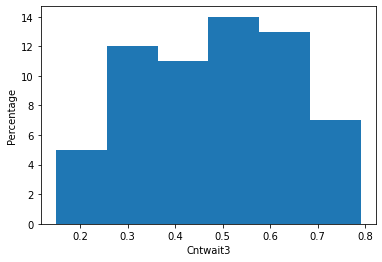

In [60]:
#Plotting histograms of the four “buzz” variables
addict_data = df['addict'].values
cmngsoon_data = df['cmngsoon'].values
fandango_data = df['fandango'].values
cntwait3_data = df['cntwait3'].values
dict_values = {'Addict':addict_data,'Cmngsoon':cmngsoon_data,'Fandango':fandango_data,'Cntwait3':cntwait3_data}
l1 = [addict_data,cmngsoon_data,fandango_data,cntwait3_data]
for k,i in dict_values.items():
    q1, q3 = np.percentile(i, [25, 75])
    bin_width = 2 * (q3 - q1) * len(i) ** (-1/3)
    bins = round((i.max() - i.min()) / bin_width)
    print("No of bins for {0} {1}".format(k,bins))
    plt.hist(i,bins=bins)  # density=False would make counts
    plt.ylabel('Percentage')
    plt.xlabel(k)
    plt.show()

**4.From the above figures and implementations it is clear that Addict,cmgsoon, fandango are right skewed, next steps would be applying log-transformations to these variables.**

In [39]:
df['addict'] = np.log(df['addict'])
df['cmngsoon'] = np.log(df['cmngsoon'])
df['fandango'] = np.log(df['fandango'])
df

,box,G,PG,PG13,budget,starpowr,sequel,action,comedy,animated,horror,addict,cmngsoon,fandango,cntwait3
0,16.768705,0,0,0,3.332205,19.83,0,0,1,0,0,8.969605,2.302585,4.969813,0.49
1,17.960336,0,1,0,5.010635,32.69,1,0,0,1,0,8.654692,4.077537,6.148468,0.79
2,15.502207,0,0,0,3.621671,15.69,0,0,1,0,0,6.745236,3.178054,5.288267,0.36
3,18.028066,0,0,1,5.298317,23.62,1,1,0,0,0,9.637306,4.532599,7.483244,0.76
4,17.082152,0,1,0,5.010635,19.02,0,0,0,1,0,8.428198,3.401197,7.011214,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,17.898476,0,1,0,5.164786,34.86,0,0,0,1,0,9.114435,4.219508,6.472346,0.70
58,15.488719,0,0,1,3.091042,4.25,0,1,0,0,0,8.066521,4.543295,3.663562,0.62
59,16.951212,0,0,1,2.815409,5.96,0,0,0,0,1,9.774745,4.060443,4.804021,0.53
60,18.077493,0,0,1,4.442651,16.62,1,1,0,0,0,9.269521,6.386879,6.744059,0.71


# **Qno :5**

In [40]:
#Linear regresison considering all independent variables
df3 = df.copy()
X3 = df3.drop('box',axis= 1)
y3 = df3['box']
X3 = sm.add_constant(X3)
linregg3 = sm.OLS(y3,X3).fit()
print(linregg3.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     5.576
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           3.77e-06
Time:                        14:58:45   Log-Likelihood:                -53.492
No. Observations:                  62   AIC:                             137.0
Df Residuals:                      47   BIC:                             168.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4958      0.993     11.581      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**5.R-squared: 0.624**
**Adj R-squared: 0.512**
**From the above summary it is clear that PG,action,animated,addict,cntwait3 variables are statistically significant at 0.10 level.**

# **Qno :6** 

In [41]:
#Linear regression considering the significant variables from 5th question
df4 = df3.copy()
df4 = df3[['PG','action','animated','addict','cntwait3','box']]
X4 = df4.drop('box',axis=1)
y4 = df4['box']
X4 = sm.add_constant(X4)
linregg = sm.OLS(y4,X4).fit()
print(linregg.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     14.15
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           6.06e-09
Time:                        14:58:49   Log-Likelihood:                -58.512
No. Observations:                  62   AIC:                             129.0
Df Residuals:                      56   BIC:                             141.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.5048      0.751     16.644      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**6.R-squared: 0.558**
**Adj R-squared: 0.519**
**From the above summary it is clear that except PG all other variables are statistically significant at 0.10 level.**

**7.So far, we have developed 4 models out of these 4, out of these we would like to choose the 4th model beacause of high R-square abd adj R-squared than models 1 and 2. Even though R-squared and adj R-squared values of 4th model are less than 3rd model, but we cannot forget the fact of collinearity and 3rd model suffers from multicollinearity issues and we can properly see them in the difference between R-squared and adj R-squared values.**

**R-squared(0.624) - adj R-squared (0.512)[3rd model] = 0.112**

**R-squared(0.558) - adj R-squared (0.519)[3rd model] = 0.039**

**A lot of variation is observed in 3rd model while a slight deviation is observed in 4th model. Use of too many independent variables and multicollinearity may be the reason for this.**



# **Qno :8** 

In [42]:
sc = StandardScaler() # Apply Standar Scaler
buzz_var = ['addict','cmngsoon','fandango','cntwait3']
a8 = pd.DataFrame(sc.fit_transform(df3[['addict','cmngsoon','fandango','cntwait3']]),columns=buzz_var)
sc.scale_ = np.std(a8,axis=0,ddof=1).to_list()
a8 = a8/sc.scale_ # Sample standard deviation
a8

,addict,cmngsoon,fandango,cntwait3
0,0.803754,-1.090305,-1.141892,0.048398
1,0.487415,0.393889,0.220592,1.963723
2,-1.430683,-0.358249,-0.773771,-0.781576
3,1.474477,0.774406,1.763547,1.772190
4,0.259896,-0.171659,1.217896,0.303775
...,...,...,...,...
57,0.949239,0.512603,0.594984,1.389125
58,-0.103418,0.783350,-2.651873,0.878372
59,1.612538,0.379595,-1.333542,0.303775
60,1.105027,2.324933,0.909074,1.452970


In [43]:
#PCA analysis
pca = PCA()
pca_1 = pca.fit_transform(a8)
print('\nPrincipal Components')
print(pca.components_) 
print("Eigen Values")
print(pca.explained_variance_) # print eigen values
print("Proportion of variance explained by each component") #print explained variance ratio
print(pca.explained_variance_ratio_)


Principal Components
[[ 0.51126957  0.54886633  0.37659341  0.54362357]
 [ 0.33932725  0.18491386 -0.91352693  0.1270135 ]
 [-0.77445054  0.29212109 -0.15349213  0.5397516 ]
 [ 0.15390517 -0.76106365 -0.00927995  0.63008666]]
Eigen Values
[2.41420026 0.77519959 0.45214886 0.3584513 ]
Proportion of variance explained by each component
[0.60355006 0.1937999  0.11303721 0.08961282]


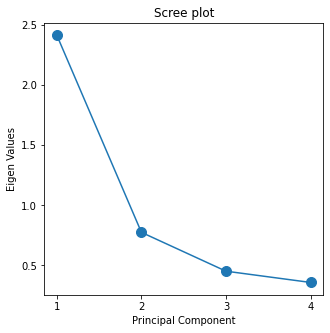

In [44]:
# scree plot (Eigen Values against sorted PCs)
plt.figure(figsize=(5, 5))
plt.xlabel("Principal Component")
plt.ylabel("Eigen Values")
plt.title("Scree plot")
plt.xticks(np.arange(1, 6)) 
plt.plot(np.arange(1,5), pca.explained_variance_)
plt.scatter(np.arange(1,5), pca.explained_variance_, s = 100)

In [45]:
expldvarsum5 = np.cumsum(pca.explained_variance_ratio_)
print('\nCumulative sum of the explained variance')
print(expldvarsum5)
expldvarpca5 = pca.explained_variance_ratio_


Cumulative sum of the explained variance
[0.60355006 0.79734996 0.91038718 1.        ]


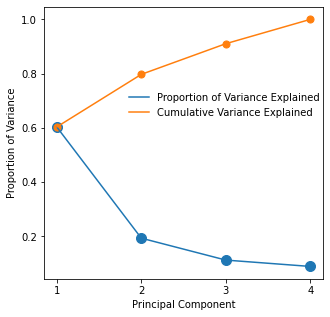

In [46]:
plt.figure(figsize=(5, 5))
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance")
plt.xticks(np.arange(1, 5)) 
plt.plot(np.arange(1,5), expldvarpca5,label='Proportion of Variance Explained')
plt.scatter(np.arange(1,5), expldvarpca5, s = 100)
plt.scatter(np.arange(1,5), expldvarsum5, s = 50)
plt.plot(np.arange(1,5), expldvarsum5,label='Cumulative Variance Explained')
plt.legend(bbox_to_anchor=(0.29, 0.7), loc='upper left', borderaxespad=0, fancybox = True, framealpha = 0)

**8) Eigen values associated with each component = [2.41420026 0.77519959 0.45214886 0.3584513 ]**

**Fraction of the variance is explained by each component = [0.60355006 0.1937999  0.11303721 0.08961282]**

**principal components are selected using Kaiser’s Rule = 1(only PC1 has eigen value greater than one)**

**principal components are selected using explained variance threshold at 60%=0,70%=1,80%=2,90%=3 , so total comes up with 2.**

In [47]:
pca_1df = pd.DataFrame(pca_1, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
a9 = df3.drop(['addict', 'cmngsoon', 'fandango','cntwait3'],axis=1)
a9_merged = pd.concat([a9,pca_1df],axis=1,join='inner')
a9_merged

,box,G,PG,PG13,budget,starpowr,sequel,action,comedy,animated,horror,PC1,PC2,PC3,PC4
0,16.768705,0,0,0,3.332205,19.83,0,0,1,0,0,-0.591216,1.120419,-0.739575,0.994585
1,17.960336,0,1,0,5.010635,32.69,1,0,0,1,0,1.615992,0.286131,0.763648,1.010510
2,15.502207,0,0,0,3.621671,15.69,0,0,1,0,0,-1.644376,0.055875,0.700252,-0.432820
3,18.028066,0,0,1,5.298317,23.62,1,1,0,0,0,2.806445,-0.742427,-0.229837,0.737825
4,17.082152,0,1,0,5.010635,19.02,0,0,0,1,0,0.662450,-1.017549,-0.274396,0.350745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,17.898476,0,1,0,5.164786,34.86,0,0,0,1,0,1.745896,0.049794,0.073061,0.625717
58,15.488719,0,0,1,3.091042,4.25,0,1,0,0,0,-0.144094,2.643883,1.190069,-0.034036
59,16.951212,0,0,1,2.815409,5.96,0,0,0,0,1,0.695724,1.874180,-0.769292,0.163062
60,18.077493,0,0,1,4.442651,16.62,1,1,0,0,0,2.973264,0.158961,0.468080,-0.692292


In [48]:
df5= None
X5,y5,linregg5 = None,None,None

# **Qno :9** 


In [49]:
#Linear regression using 4 principal components
df5 = a9_merged.copy()
X5 = df5.drop('box',axis= 1)
y5 = df5['box']
X5 = sm.add_constant(X5)
linregg5 = sm.OLS(y5,X5).fit()
print(linregg5.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     5.576
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           3.77e-06
Time:                        14:59:02   Log-Likelihood:                -53.492
No. Observations:                  62   AIC:                             137.0
Df Residuals:                      47   BIC:                             168.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.5293      0.675     22.991      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**9.R-squared: 0.624**
**Adj R-squared: 0.512**
**From the above summary it is clear that PG,action,animated and PC1, variables are statistically significant at 0.10 level.**
**The above statistics are quite similar to model-3, we haven't seen much significant difference with PCA. Hope we can see the significance of PCA in upcoming models.**

# **Qno: 10**

In [50]:
#Linear regression considering number of principal components using kaiser's rule
X6_1 = df5.drop(['box','PC2','PC3','PC4'],axis= 1)
y6_1 = df5['box']
X6_1 = sm.add_constant(X6_1)
linregg6_1 = sm.OLS(y6_1,X6_1).fit()
print(linregg6_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     6.510
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           1.39e-06
Time:                        14:59:05   Log-Likelihood:                -56.278
No. Observations:                  62   AIC:                             136.6
Df Residuals:                      50   BIC:                             162.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.4002      0.643     23.960      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [51]:
#Linear regression considering principal components from explained variance
X6_2 = df5.drop(['box','PC3','PC4'],axis= 1)
y6_2 = df5['box']
X6_2 = sm.add_constant(X6_2)
linregg6_2 = sm.OLS(y6_2,X6_2).fit()
print(linregg6_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     6.357
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           1.27e-06
Time:                        14:59:06   Log-Likelihood:                -54.729
No. Observations:                  62   AIC:                             135.5
Df Residuals:                      49   BIC:                             163.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.2565      0.640     23.849      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**10. Out of all the regression models developed so far involving PCA, I would recommend the last model which involves 2 PC's because of better R-squared and adjusted R-squared values( even though R-squared and adjusted R-squared values are similar to the model developed in 9th question, but the absolute difference is minimal in last model when compared to that of model developed in 9th question).**

In [52]:
df

,box,G,PG,PG13,budget,starpowr,sequel,action,comedy,animated,horror,addict,cmngsoon,fandango,cntwait3
0,16.768705,0,0,0,3.332205,19.83,0,0,1,0,0,8.969605,2.302585,4.969813,0.49
1,17.960336,0,1,0,5.010635,32.69,1,0,0,1,0,8.654692,4.077537,6.148468,0.79
2,15.502207,0,0,0,3.621671,15.69,0,0,1,0,0,6.745236,3.178054,5.288267,0.36
3,18.028066,0,0,1,5.298317,23.62,1,1,0,0,0,9.637306,4.532599,7.483244,0.76
4,17.082152,0,1,0,5.010635,19.02,0,0,0,1,0,8.428198,3.401197,7.011214,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,17.898476,0,1,0,5.164786,34.86,0,0,0,1,0,9.114435,4.219508,6.472346,0.70
58,15.488719,0,0,1,3.091042,4.25,0,1,0,0,0,8.066521,4.543295,3.663562,0.62
59,16.951212,0,0,1,2.815409,5.96,0,0,0,0,1,9.774745,4.060443,4.804021,0.53
60,18.077493,0,0,1,4.442651,16.62,1,1,0,0,0,9.269521,6.386879,6.744059,0.71


# **Qno : 11**

In [53]:
sc = StandardScaler() # Call standard scaler function from sklearn
cont_var = ['budget','starpowr','addict','cmngsoon','fandango','cntwait3']
a10 = pd.DataFrame(sc.fit_transform(df3[['budget','starpowr','addict','cmngsoon','fandango','cntwait3']]),columns=cont_var)
sc.scale_ = np.std(a10,axis=0,ddof=1).to_list()
a10 = a10/sc.scale_ # sample standard deviation
a10

,budget,starpowr,addict,cmngsoon,fandango,cntwait3
0,-0.525394,0.202644,0.803754,-1.090305,-1.141892,0.048398
1,1.780188,1.651723,0.487415,0.393889,0.220592,1.963723
2,-0.127768,-0.263855,-1.430683,-0.358249,-0.773771,-0.781576
3,2.175363,0.629705,1.474477,0.774406,1.763547,1.772190
4,1.780188,0.111373,0.259896,-0.171659,1.217896,0.303775
...,...,...,...,...,...,...
57,1.991937,1.896241,0.949239,0.512603,0.594984,1.389125
58,-0.856667,-1.552927,-0.103418,0.783350,-2.651873,0.878372
59,-1.235292,-1.360242,1.612538,0.379595,-1.333542,0.303775
60,0.999975,-0.159062,1.105027,2.324933,0.909074,1.452970


In [54]:
pca2 = PCA()
pca_2 = pca2.fit_transform(a10)
print('\nPrincipal Components')
print(pca2.components_)
print("Eigen Values") 
print(pca2.explained_variance_) # print eigen values
print("Proportion of variance explained by each component")
print(pca2.explained_variance_ratio_) #print explained variance ratio


Principal Components
[[-0.434969   -0.24354716 -0.40048435 -0.42290479 -0.3804649  -0.51720116]
 [-0.40782831 -0.66977854  0.40376224  0.45426654 -0.11178511  0.05652287]
 [ 0.07030385  0.24917939  0.19651156 -0.0031937  -0.88743515  0.32680094]
 [-0.11952631  0.1751475   0.79075495 -0.48920846  0.11412638 -0.27819718]
 [ 0.78223141 -0.53090539  0.07914513 -0.16018966 -0.15227696 -0.22614273]
 [ 0.11559798  0.34271552  0.08008871  0.5914369  -0.13782705 -0.7028336 ]]
Eigen Values
[2.83823382 1.45442671 0.70232212 0.44299297 0.34049709 0.2215273 ]
Proportion of variance explained by each component
[0.47303897 0.24240445 0.11705369 0.07383216 0.05674951 0.03692122]


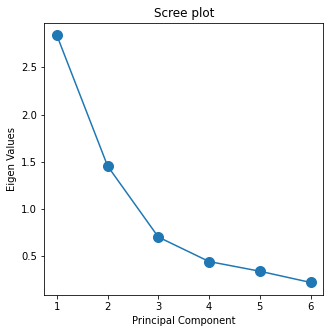

In [55]:
# scree plot (Eigen Values against sorted PCs)
plt.figure(figsize=(5, 5))
plt.xlabel("Principal Component")
plt.ylabel("Eigen Values")
plt.title("Scree plot")
plt.xticks(np.arange(1, 7)) 
plt.plot(np.arange(1,7), pca2.explained_variance_)
plt.scatter(np.arange(1,7), pca2.explained_variance_, s = 100)

In [56]:
expldvarsum11 = np.cumsum(pca2.explained_variance_ratio_)
print('\nCumulative sum of the explained variance')
print(expldvarsum11)
expldvarpca11 = pca2.explained_variance_ratio_


Cumulative sum of the explained variance
[0.47303897 0.71544342 0.83249711 0.90632927 0.96307878 1.        ]


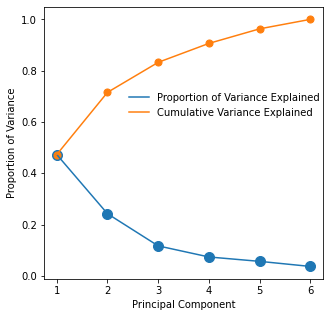

In [57]:
plt.figure(figsize=(5, 5))
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance")
plt.xticks(np.arange(1, 7)) 
plt.plot(np.arange(1,7), expldvarpca11,label='Proportion of Variance Explained')
plt.scatter(np.arange(1,7), expldvarpca11, s = 100)
plt.scatter(np.arange(1,7), expldvarsum11, s = 50)
plt.plot(np.arange(1,7), expldvarsum11,label='Cumulative Variance Explained')
plt.legend(bbox_to_anchor=(0.29, 0.7), loc='upper left', borderaxespad=0, fancybox = True, framealpha = 0)

**11) Eigen values associated with each component = [2.83823382 1.45442671 0.70232212 0.44299297 0.34049709 0.2215273]**

**Fraction of the variance is explained by each component = [0.47303897 0.24240445 0.11705369 0.07383216 0.05674951 0.03692122]**

**principal components are selected using Kaiser’s Rule = 2(only 2 PC'S have eigen value greater than one)**

**principal components are selected using explained variance threshold at 60%=1,70%=1,80%=2,90%=4 , so total comes up with 4.**

# **Qno 12**

In [58]:
# Linear regression considering principal components using kaiser's rule
a12_merged = pd.DataFrame(pca_2, columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6'])
# a12 = df3.drop(['budget','starpowr','addict', 'cmngsoon', 'fandango','cntwait3'],axis=1)
# a12_merged = pd.concat([a12,pca_2df],axis=1,join='inner')
# X7 = a12_merged.drop(['box','PC3','PC4','PC5','PC6'],axis=1)
X7 = a12_merged.drop(['PC3','PC4','PC5','PC6'],axis=1)
X7 = sm.add_constant(X7)
y7 = df['box']
linregg7 = sm.OLS(y7,X7).fit()
print(linregg7.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     22.31
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           6.10e-08
Time:                        14:59:19   Log-Likelihood:                -66.372
No. Observations:                  62   AIC:                             138.7
Df Residuals:                      59   BIC:                             145.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.4799      0.092    179.349      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [59]:
#Linear Regression using principal components using explained variance ratio
X8 = a12_merged.drop(['PC5','PC6'],axis=1) 
X8 = sm.add_constant(X8)
y8 = df['box']
linregg8 = sm.OLS(y8,X8).fit()
print(linregg8.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     11.69
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           5.34e-07
Time:                        14:59:20   Log-Likelihood:                -65.262
No. Observations:                  62   AIC:                             140.5
Df Residuals:                      57   BIC:                             151.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.4799      0.092    179.467      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**12) The R-squared and Adjusted R-squared values of these two models are**
**(0.431,0.411) and (0.451,0.412), out of these two models we would recommend the 2nd model which involves 4 Principal Components because of slightly higher R-squared values. But, when these models are compared to previous developed models, the R-squared and adjusted** **r-squared values are way lower.**